In [23]:
import tensorflow as tf
import numpy as np
import cv2

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/hackathon_swf/lite-model_movenet_singlepose_lightning_tflite_float16_4.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [54]:
!python -m tf2onnx.convert --tflite /content/drive/MyDrive/hackathon_swf/lite-model_movenet_singlepose_lightning_tflite_float16_4.tflite --output /content/drive/MyDrive/hackathon_swf/kps_detector.onnx --opset 13

2023-08-26 14:16:52.241780: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2023-08-26 14:16:55,813 - INFO - Using tensorflow=2.12.0, onnx=1.14.1, tf2onnx=1.15.1/37820d
2023-08-26 14:16:55,813 - INFO - Using opset <onnx, 13>
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
2023-08-26 14:16:56,377 - INFO - Optimizing ONNX model
2023-08-26 14:16:58,067 - INFO - After optimization: Cast -165 (175->10), Const -109 (281->172), Identity -1 (1->0), Reshape -23 (36->13), Transpose -298 (302->4), Unsqueeze -2 (8->6)
2023-08-26 14:16:58,154 - INFO - 
2023-08-26 14:16:58,154 - INFO - Successfully converted TensorFlow model /content/drive/MyDrive/hackathon_swf/lite-model_movenet_singlepose_lightning_tflite_f

In [92]:
img = cv2.imread("/content/drive/MyDrive/hackathon_swf/golf3.jpg", cv2.IMREAD_UNCHANGED)
img = cv2.resize(img, (192, 192))
img = img[None, ...].astype(np.uint8)
img.shape

(1, 192, 192, 3)

In [93]:
input_shape = input_details[0]['shape']
interpreter.set_tensor(input_details[0]['index'], img)
interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[[[0.38269275 0.5963134  0.4111372 ]
   [0.3683883  0.59461075 0.4693565 ]
   [0.37176573 0.59047335 0.3420507 ]
   [0.36448658 0.6118324  0.4921407 ]
   [0.37104315 0.6006315  0.30919415]
   [0.40547663 0.65378064 0.35886306]
   [0.41501573 0.6426155  0.32207534]
   [0.4681754  0.68854785 0.18741027]
   [0.49859157 0.69636023 0.22613135]
   [0.38854355 0.66740507 0.16251725]
   [0.4253678  0.6473403  0.10603783]
   [0.59944457 0.707594   0.4839305 ]
   [0.59896904 0.70581186 0.37870288]
   [0.76284814 0.69218487 0.4899665 ]
   [0.7636705  0.69269407 0.49901876]
   [0.9323095  0.720712   0.56261957]
   [0.92069393 0.7189463  0.40309894]]]]


In [94]:
kps = output_data[0][0]

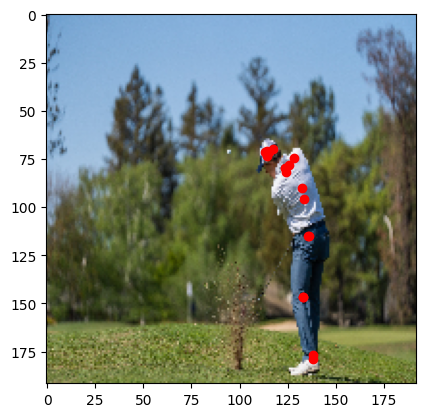

In [95]:
plt.imshow(img[0][:, :, ::-1])

x = kps[:, 0]*img.shape[1]
y = kps[:, 1]*img.shape[2]

plt.scatter(y, x, c='r')

In [96]:
ls = 5
rs = 6
lh = 11
rh = 12
lk = 13
rk = 14

def get_right_left_distances(kps):
    kps_normed = kps[:, :2]
    kps_normed = (np.max(kps_normed, axis=0) - kps_normed)/(np.max(kps_normed, axis=0) - np.min(kps_normed, axis=0))

    ls_kps = np.asarray(kps_normed[ls]).reshape((2, 1))
    rs_kps = np.asarray(kps_normed[rs]).reshape((2, 1))

    lh_kps = np.asarray(kps_normed[lh]).reshape((2, 1))
    rh_kps = np.asarray(kps_normed[rh]).reshape((2, 1))

    lk_kps = np.asarray(kps_normed[lk]).reshape((2, 1))
    rk_kps = np.asarray(kps_normed[rk]).reshape((2, 1))

    return (np.linalg.norm(ls_kps-rs_kps), np.linalg.norm(lh_kps-rh_kps), np.linalg.norm(lk_kps-rk_kps))



In [97]:
get_right_left_distances(kps[:, :2])

(0.087358855, 0.0137090925, 0.004169385)

In [101]:
img2 = cv2.resize(img[0], (160, 160))

In [105]:
cv2.imwrite("/content/golf160.png", img2)

True

golf2: 0.5911605 0.34671208 0.3183451

golf: 0.048250496 0.09104395 0.031811412